In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df = pd.read_csv('/content/train.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
#Визуализируйте распределение значений признаков Survived, Pclass, Age, Sex, Parch
fig1=px.histogram(df, x='Survived', title = 'Survived Histogram', color = 'Survived')
fig2=px.histogram(df, x='Pclass', title = 'Pclass Histogram', color = 'Pclass')

fig1.show()
fig2.show()

In [12]:
#Распределение Age, Sex и Parch
fig3=px.histogram(df, x='Age', title = 'Age Histogram', color = 'Age')
fig4=px.histogram(df, x='Sex', title = 'Sex Histogram', color = 'Sex')
fig5=px.histogram(df, x='Parch', title = 'Parch Histogram', color = 'Parch')

fig3.show()
fig4.show()
fig5.show()

In [21]:
#Постройте график типа boxplot для столбца Age
figbox= px.box(df,
               y='Age',
               title='Boxplot Distribution for Age',
)
figbox.show()

In [ ]:
#Диапазон возрастов пассажиров - от 0 до ~ 64 за исключением выбросов
#Медианный возраст пассажиров - примерно 28 лет
#Выбросы наблюдаем только выше диапазона, старше 64 лет

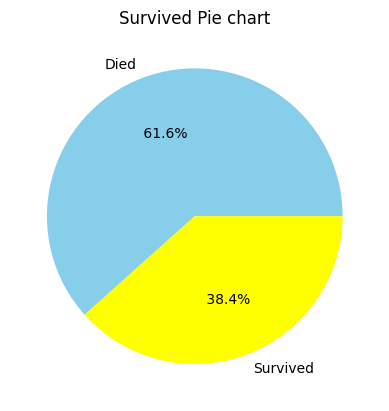

In [ ]:
#Постройте график типа pie chart для переменных Survived, Pclass, подпишите доли в процентах
survived_quantity=df['Survived'].value_counts()
plt.pie(
    survived_quantity,
    labels=['Died', 'Survived'],
    autopct= ' %1.1f%%',
    colors=['skyblue','yellow']
)
plt.title('Survived Pie chart')
plt.show()

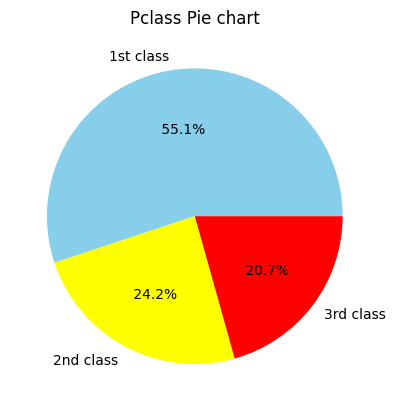

In [ ]:
pclass_counts=df['Pclass'].value_counts()
plt.pie(
    pclass_counts,
    labels=['1st class', '2nd class','3rd class'],
    autopct= ' %1.1f%%',
    colors=['skyblue','yellow','red']
)
plt.title('Pclass Pie chart')
plt.show()

Text(0.5, 1, 'Pairplot for numeric variables')

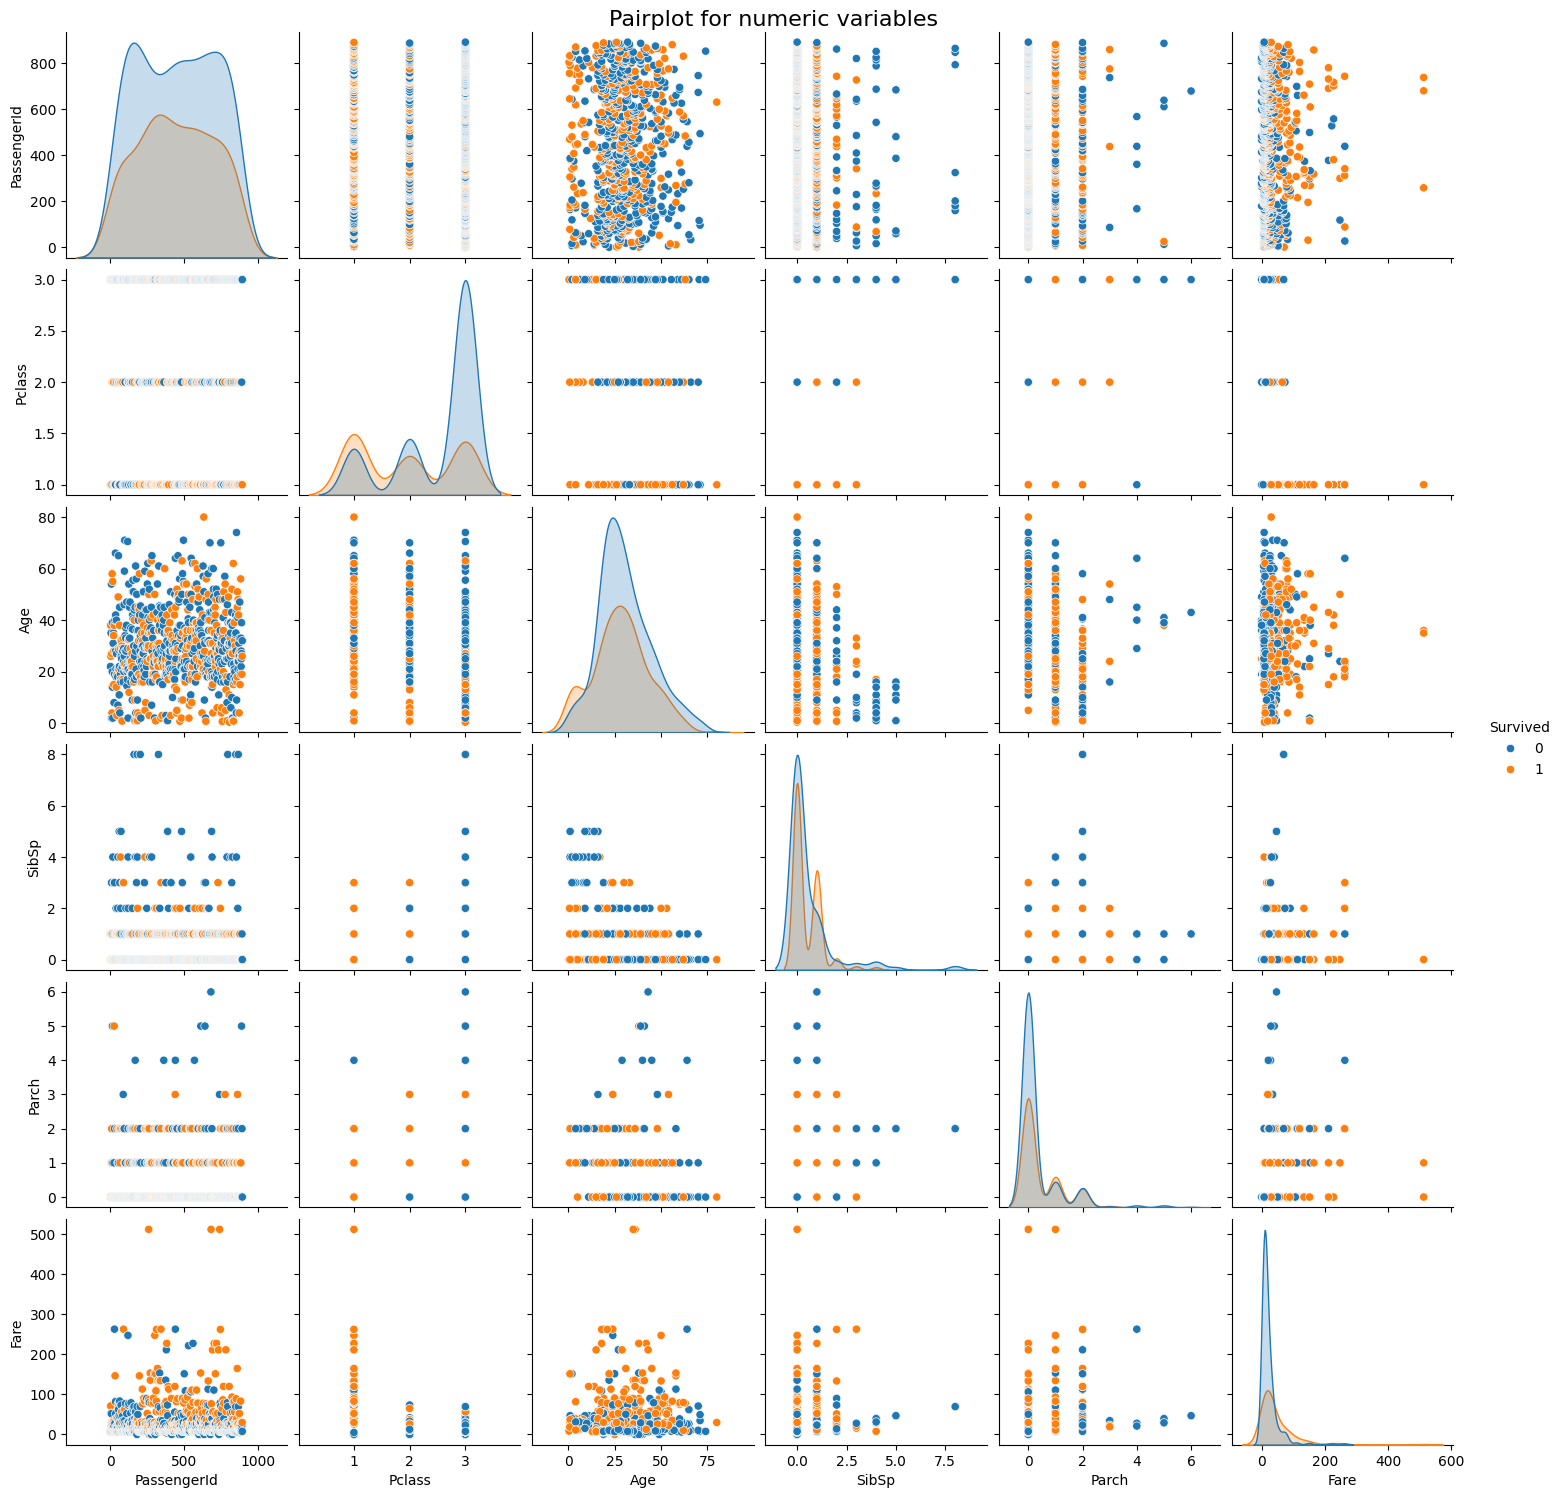

In [36]:
#Постройте график типа pairplot для всех числовых переменных датасета
numeric_variables=df.select_dtypes(include=['float64','int64'])
numeric_variables
sns.pairplot(numeric_variables, hue='Survived',kind='scatter').fig.suptitle('Pairplot for numeric variables',y=1,fontsize=16)

In [19]:
#Постройте интерактивный sunburst plot (визуализация иерархических данных) с помощью plotly.
#На первом уровне иерархии - количество пассажиров в каждом из классов, а на втором количество женщин/мужчин в этом классе

grouped = df.groupby(['Sex','Pclass']).size().reset_index(name='count')
grouped

,Sex,Pclass,count
0,female,1,94
1,female,2,76
2,female,3,144
3,male,1,122
4,male,2,108
5,male,3,347


In [32]:
#Sunburst

figsun=px.sunburst(grouped,
                   names='Sex',
                   parents='Pclass',
                   values ='count',
                   color='Sex',
                   title="Sunburst Plot for Passengers by Sex and Class"
                   )
figsun.show()
#не понимаю, почему Jupiter не выводит визуализацию именно sunburst:( и для кода из видео-урока тоже не строит именно его